In [2]:
import torch
import pandas as pd
import numpy as np

In [3]:
distances = torch.load("../ckpts/distances (3).pt")
indices = torch.load("../ckpts/indices (3).pt")
print(distances.shape)
print(indices.shape)

meta = pd.read_csv("../../data/train_equal_species_ids.csv")
sample_submission = pd.read_csv("../../data/sample_submission.csv")

(27956, 5)
(27956, 5)


In [4]:
# torch predictions to pandas
pred = pd.DataFrame(indices)
# make indicies of the embeddings to corresponding id
pred = pred.applymap(lambda x: meta.iloc[x]['individual_id'])
# add test image col
pred['image'] = sample_submission['image']


In [5]:
# make predictions to one space seperated col
pred['predictions'] = pred[[0,1,2,3,4]].agg(" ".join, axis=1)

In [7]:
pred[['image', 'predictions']].to_csv('../ckpts/submission.csv', index=False)

In [8]:
pred

,0,1,2,3,4,image,predictions
0,50818c5b1202,25a6b2ac9582,778419da2957,aff93d9d3356,208b91b1ca2b,000110707af0ba.jpg,50818c5b1202 25a6b2ac9582 778419da2957 aff93d9...
1,50818c5b1202,778419da2957,2c45eacc8a8f,0e4660baf3f1,a6e325d8e924,0006287ec424cb.jpg,50818c5b1202 778419da2957 2c45eacc8a8f 0e4660b...
2,cb0fed574200,122dc7f46c24,a1cb1587e405,989563596678,d218dff09dab,000809ecb2ccad.jpg,cb0fed574200 122dc7f46c24 a1cb1587e405 9895635...
3,1a20c92ffe68,bbeac4b2964e,91ed5caeb0d3,1492507238d8,bbeac4b2964e,00098d1376dab2.jpg,1a20c92ffe68 bbeac4b2964e 91ed5caeb0d3 1492507...
4,1e68701cc439,52f982a78a47,ea0b492885b0,39f4fb71b739,de917b1c85ba,000b8d89c738bd.jpg,1e68701cc439 52f982a78a47 ea0b492885b0 39f4fb7...
...,...,...,...,...,...,...,...
27951,2c45eacc8a8f,50818c5b1202,208b91b1ca2b,778419da2957,daa006a682c7,fff6ff1989b5cd.jpg,2c45eacc8a8f 50818c5b1202 208b91b1ca2b 778419d...
27952,1e68701cc439,aca430d73cdc,2aa3e856e46e,39f4fb71b739,de917b1c85ba,fff8fd932b42cb.jpg,1e68701cc439 aca430d73cdc 2aa3e856e46e 39f4fb7...
27953,a1cb1587e405,50818c5b1202,aff93d9d3356,989563596678,f2ddd02312a7,fff96371332c16.jpg,a1cb1587e405 50818c5b1202 aff93d9d3356 9895635...
27954,208b91b1ca2b,50818c5b1202,778419da2957,0e4660baf3f1,a6e325d8e924,fffc1c4d3eabc7.jpg,208b91b1ca2b 50818c5b1202 778419da2957 0e4660b...


In [20]:
len(np.unique(indices))

7070

In [4]:
ref = torch.load("../ckpts/reference_embeddings.pt")
q = torch.load("../ckpts/query_embeddings.pt")

In [3]:
import torch
import faiss
from pytorch_metric_learning.utils.accuracy_calculator import AccuracyCalculator

In [5]:
index = faiss.IndexFlatIP(512)

In [7]:
index.add(ref[:3].float().numpy())

In [2]:
dist, ind = index.search(q[:3].float().numpy(), 5)

NameError: name 'index' is not defined

In [1]:
dist

NameError: name 'dist' is not defined

In [8]:
ref[:3].float()

tensor([[0.0000, 0.0000, 0.1169,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 1.7100, 0.4736, 0.0000],
        [1.0742, 0.0000, 0.0000,  ..., 0.4871, 0.0000, 0.4663]])

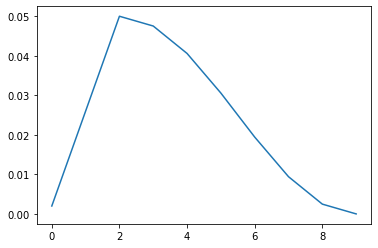

In [19]:

import torch
import matplotlib.pyplot as plt

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.05, epochs=10, steps_per_epoch=1)
# steps_per_epoch=,


lrs = []

for i in range(10):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ", round(0.65 ** i,3)," , Learning Rate = ",round(optimizer.param_groups[0]["lr"],3))
    scheduler.step()

plt.plot(range(10),lrs)